In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading the dataset
df = pd.read_csv('output.csv')

# Split the dataset into features (X) and target (y)
X = df.drop('Disease', axis=1)
y = df['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with multiple Decision Trees (n_estimators)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}')

# checking which diseases are predicted wrong 
# for actual, predicted in zip(y_test, y_pred):
#     if actual != predicted:
#         print(f"Actual: {actual}, Predicted: {predicted}")

print(len(set(y)))

Accuracy: 96.83
168


In [2]:
# Initialize the RandomForestClassifier with multiple Decision Trees (n_estimators)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 96.83


In [3]:
import pickle

# Save the 'clf' model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [54]:
from sklearn.preprocessing import LabelEncoder

# Assuming your target variable is 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print unique values before and after encoding
print("Unique values in y:", set(y))
print("Unique values in y_encoded:", set(y_encoded))

Unique values in y: 168
Unique values in y_encoded: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167}


In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an SVM classifier
model = make_pipeline(StandardScaler(), SVC())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM Accuracy: {accuracy:.2f}")

SVM Accuracy: 96.83


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"KNN Accuracy: {accuracy:.2f}")


KNN Accuracy: 96.83


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [7]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Naive Bayes Accuracy: {accuracy:.2f}")


Naive Bayes Accuracy: 96.83


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# AdaBoost Classifier
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can use any classifier as the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(probability=True, kernel='linear', C=1.0)

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('adaboost', adaboost_classifier),
        ('svm', svm_classifier),
        ('knn', knn_classifier)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the classifiers
adaboost_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
voting_classifier.fit(X_train, y_train)

# Make predictions
adaboost_pred = adaboost_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)
voting_pred = voting_classifier.predict(X_test)

# Evaluate the performance
print(f"AdaBoost Accuracy: {accuracy_score(y_test, adaboost_pred)}")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred)}")
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_pred)}")


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


AdaBoost Accuracy: 0.1671612265084075
SVM Accuracy: 0.9683481701285855
KNN Accuracy: 0.9683481701285855
Voting Classifier Accuracy: 0.9683481701285855


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Classifier
base_classifier_dt = DecisionTreeClassifier(max_depth=5)

# Support Vector Machine (SVM) Classifier
base_classifier_svm = SVC(probability=True, kernel='linear', C=1.0)

# K-Nearest Neighbors (KNN) Classifier
base_classifier_knn = KNeighborsClassifier(n_neighbors=5)

# Random Forest Classifier
base_classifier_rf = RandomForestClassifier(n_estimators=150, random_state=42)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', base_classifier_dt),
        ('svm', base_classifier_svm),
        ('knn', base_classifier_knn),
        ('random_forest', base_classifier_rf)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the classifiers
base_classifier_dt.fit(X_train, y_train)
base_classifier_svm.fit(X_train, y_train)
base_classifier_knn.fit(X_train, y_train)
base_classifier_rf.fit(X_train, y_train)
voting_classifier.fit(X_train, y_train)

# Make predictions
dt_pred = base_classifier_dt.predict(X_test)
svm_pred = base_classifier_svm.predict(X_test)
knn_pred = base_classifier_knn.predict(X_test)
rf_pred = base_classifier_rf.predict(X_test)
voting_pred = voting_classifier.predict(X_test)

# Evaluate the performance
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_pred)}")


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Tree Accuracy: 0.09792284866468842
SVM Accuracy: 0.9683481701285855
KNN Accuracy: 0.9683481701285855
Random Forest Accuracy: 0.9683481701285855
Voting Classifier Accuracy: 0.9683481701285855


In [10]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Classifier
base_classifier_dt = DecisionTreeClassifier(max_depth=5)
base_classifier_dt.fit(X_train, y_train)
dt_pred = base_classifier_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Support Vector Machine (SVM) Classifier
base_classifier_svm = SVC(probability=True, kernel='linear', C=1.0)
base_classifier_svm.fit(X_train, y_train)
svm_pred = base_classifier_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
# RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")

# GradientBoosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_depth=1, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred)}")

# SVM Classifier
svm_classifier = SVC(probability=True, kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# K-Nearest Neighbors (KNN) Classifier
base_classifier_knn = KNeighborsClassifier(n_neighbors=5)
base_classifier_knn.fit(X_train, y_train)
knn_pred = base_classifier_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Random Forest Classifier
base_classifier_rf = RandomForestClassifier(n_estimators=50, random_state=42)
base_classifier_rf.fit(X_train, y_train)
rf_pred = base_classifier_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# AdaBoost Classifier
base_classifier_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
base_classifier_ada.fit(X_train, y_train)
ada_pred = base_classifier_ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', base_classifier_dt),
        ('svm', base_classifier_svm),
        ('knn', base_classifier_knn),
        ('random_forest', base_classifier_rf),
        ('ada_boost', base_classifier_ada)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

voting_classifier.fit(X_train, y_train)
voting_pred = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)

# Print accuracies together
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"AdaBoost Accuracy: {ada_accuracy}")
print(f"Voting Classifier Accuracy: {voting_accuracy}")


Random Forest Accuracy: 0.9683481701285855
Gradient Boosting Accuracy: 0.1493570722057369


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Tree Accuracy: 0.09792284866468842
SVM Accuracy: 0.9683481701285855
KNN Accuracy: 0.9683481701285855
Random Forest Accuracy: 0.9683481701285855
AdaBoost Accuracy: 0.1671612265084075
Voting Classifier Accuracy: 0.9683481701285855


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

voting_accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

voting_precision = precision_score(y_test, y_pred, average='weighted')
voting_recall = recall_score(y_test, y_pred, average='weighted')
voting_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Voting Classifier Precision: {voting_precision}")
print(f"Voting Classifier Recall: {voting_recall}")
print(f"Voting Classifier F1 Score: {voting_f1}")

Voting Classifier Accuracy: 0.9683481701285855
Voting Classifier Precision: 0.9516013034728258
Voting Classifier Recall: 0.9683481701285855
Voting Classifier F1 Score: 0.9583380624599073


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('output.csv')

# Split the dataset into features (X) and target (y)
X = df.drop('Disease', axis=1)
y = df['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Initialize the RandomForestClassifier with multiple Decision Trees (n_estimators)
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Decision Tree')
print(f'Accuracy: {accuracy}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Decision Tree
Accuracy: 97.42828882294758
Precision: 0.973430198847164
Recall: 0.9742828882294757
F1 Score: 0.9738121526990481


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree Classifier
base_classifier_dt = DecisionTreeClassifier()
base_classifier_dt.fit(X_train, y_train)
dt_pred = base_classifier_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted', zero_division=1)
dt_recall = recall_score(y_test, dt_pred, average='weighted', zero_division=1)
dt_f1 = f1_score(y_test, dt_pred, average='weighted', zero_division=1)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_pred, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_pred, average='weighted', zero_division=1)

# Support Vector Machine (SVM) Classifier
base_classifier_svm = SVC(probability=True, kernel='linear', C=1.0)
base_classifier_svm.fit(X_train, y_train)
svm_pred = base_classifier_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, svm_pred, average='weighted', zero_division=1)
svm_f1 = f1_score(y_test, svm_pred, average='weighted', zero_division=1)

# K-Nearest Neighbors (KNN) Classifier
base_classifier_knn = KNeighborsClassifier(n_neighbors=5)
base_classifier_knn.fit(X_train, y_train)
knn_pred = base_classifier_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', clf),
        ('svm', base_classifier_svm),
        ('random_forest', rf_classifier),
        ('knn', base_classifier_knn),
    ],
    voting='soft'
)

voting_classifier.fit(X_train, y_train)
voting_pred = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_precision = precision_score(y_test, voting_pred, average='weighted', zero_division=1)
voting_recall = recall_score(y_test, voting_pred, average='weighted', zero_division=1)
voting_f1 = f1_score(y_test, voting_pred, average='weighted', zero_division=1)

print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy * 100}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")

print("\nSVM:")
print(f"Accuracy: {svm_accuracy * 100}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")

print("\nVoting Classifier:")
print(f"Accuracy: {voting_accuracy * 100}")
print(f"Precision: {voting_precision}")
print(f"Recall: {voting_recall}")
print(f"F1 Score: {voting_f1}")


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



Random Forest:
Accuracy: 97.42828882294758
Precision: 0.9981536432575008
Recall: 0.9742828882294757
F1 Score: 0.973810934571359

SVM:
Accuracy: 97.42828882294758
Precision: 0.9930678362923665
Recall: 0.9742828882294757
F1 Score: 0.9707203984680051

Voting Classifier:
Accuracy: 97.42828882294758
Precision: 1.0
Recall: 0.9742828882294757
F1 Score: 0.9747659466795482


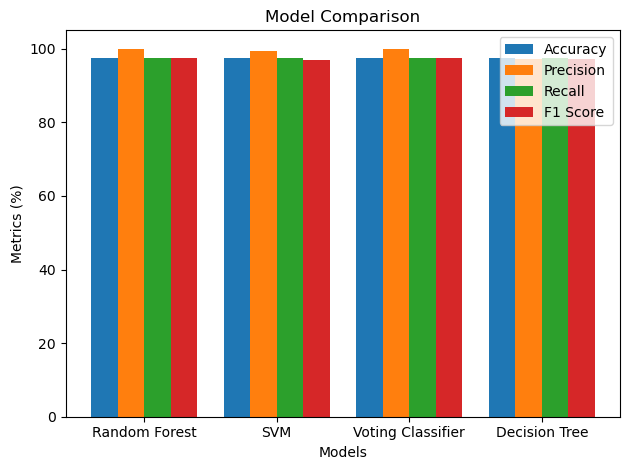

In [50]:
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['Random Forest', 'SVM', 'Voting Classifier', 'Decision Tree']
accuracy = [97.43, 97.43, 97.43, 97.43]
precision = [99.81, 99.31, 100.0, 97.11]
recall = [97.43, 97.43, 97.43, 97.43]
f1_score = [97.38, 97.07, 97.48, 97.25]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
index = range(len(models))

# Create a bar chart
plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')
plt.bar([i + 3 * bar_width for i in index], f1_score, bar_width, label='F1 Score')

# Customize the plot (labels, title, etc.)
plt.xlabel('Models')
plt.ylabel('Metrics (%)')
plt.title('Model Comparison')
plt.xticks([i + 1.5 * bar_width for i in index], models)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

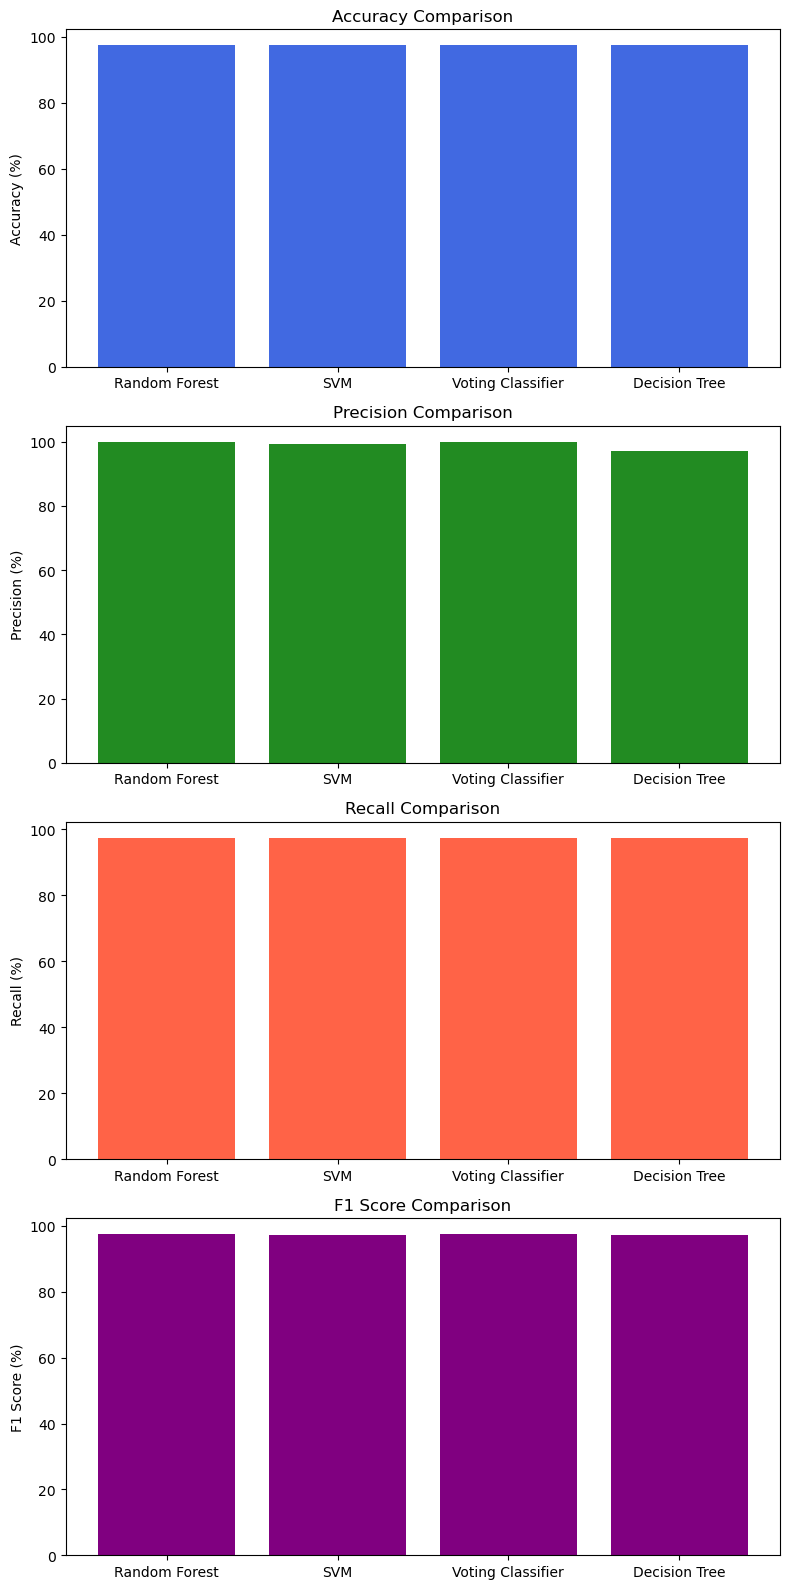

In [51]:
import matplotlib.pyplot as plt

# Sample data (replace with actual values)
models = ['Random Forest', 'SVM', 'Voting Classifier', 'Decision Tree']
accuracy = [97.43, 97.43, 97.43, 97.43]
precision = [99.82, 99.31, 100.0, 97.11]
recall = [97.43, 97.43, 97.43, 97.43]
f1_score = [97.38, 97.07, 97.48, 97.25]

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 16))

# Plot Accuracy
axs[0].bar(models, accuracy, color='royalblue')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('Accuracy Comparison')

# Plot Precision
axs[1].bar(models, precision, color='forestgreen')
axs[1].set_ylabel('Precision (%)')
axs[1].set_title('Precision Comparison')

# Plot Recall
axs[2].bar(models, recall, color='tomato')
axs[2].set_ylabel('Recall (%)')
axs[2].set_title('Recall Comparison')

# Plot F1 Score
axs[3].bar(models, f1_score, color='purple')
axs[3].set_ylabel('F1 Score (%)')
axs[3].set_title('F1 Score Comparison')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()